# Assignment 6
1. Use yeast dataset from UCI http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data
2. Remove the first column and use the last column as the target
3. Only leave CYT and VAC classes
4. Replace [0.3, 0.5, 0.7] in feature 2 to null
5. Replace [0.26, 0.36, 0.64] in feature 3 to null
6. Split the data
7. Impute the data (or not, it's your call)
8. Build a outlier detection model to classify VAC from CYT, i.e. 0 from 1
9. Build a classifer using sample augmentation techniques to classify VAC from CYT, i.e. 0 from 1
10. Try different methods and hyper parameters

11. Report perfromance using F-1 score

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import libraries
%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 9]
nan = np.nan

In [5]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
names = ['Sequence Name','mcg', 'gvh', 'alm', 'mit', 'erl','pox','vac','nuc', 'label']
df = pd.read_csv(url + 'yeast.data', header=None, names=names, delim_whitespace=True)
df

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,label
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [6]:
# Only leave CYT and VAC classes
df = (df.loc[(df['label'] == 'CYT') | (df['label'] == 'VAC')])
df.label.unique()

array(['CYT', 'VAC'], dtype=object)

In [7]:
# Replace CYT by 0 and VAC by 1 on target variable
df = df.replace({'label' : { 'CYT':0, 'VAC':1 }})

In [8]:
# Replace [0.3, 0.5, 0.7] in feature 2 to null
df = df.replace({'gvh' : { 0.3:nan, 0.5:nan, 0.7:nan }})

# Replace [0.26, 0.36, 0.64] in feature 3 to null
df = df.replace({'alm' : { 0.26:nan, 0.36:nan, 0.64:nan }})

In [9]:
df.isna().sum()

Sequence Name     0
mcg               0
gvh              26
alm               5
mit               0
erl               0
pox               0
vac               0
nuc               0
label             0
dtype: int64

In [10]:
df

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,label
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
9,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0
12,ACH1_YEAST,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,0
15,ACT_YEAST,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,0
16,ACT2_YEAST,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,0
...,...,...,...,...,...,...,...,...,...,...
1475,YP53_YEAST,0.71,NaN,0.50,0.18,0.5,0.0,0.46,0.22,0
1476,YPT7_YEAST,0.61,0.48,0.54,0.25,0.5,0.0,0.50,0.22,0
1477,R29A_YEAST,0.38,0.32,NaN,0.41,0.5,0.0,0.44,0.11,0
1478,R29B_YEAST,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,0


In [11]:
# Remove the first column and use the last column as the target
X = df.iloc[: ,1:9]
y = df.iloc[:,-1]


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale data before applying KNNImputer
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute the data (or not, it's your call)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [13]:
df['label'].value_counts()

0    463
1     30
Name: label, dtype: int64

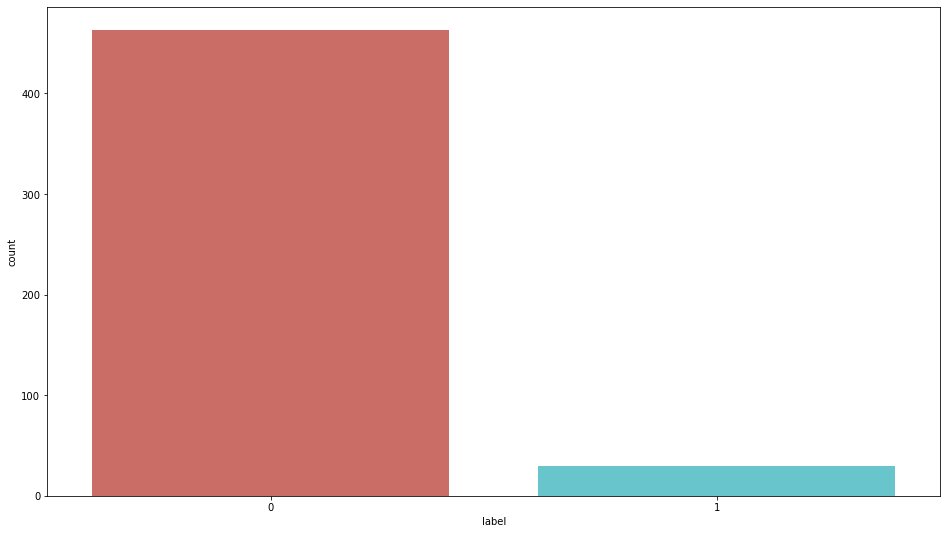

In [14]:
sns.countplot(x='label', data=df, palette='hls')
plt.show()

In [15]:
df.groupby('label').mean()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
label,,,,,,,,
0,0.480713,0.469203,0.534510,0.227106,0.50432,0.00108,0.499395,0.257235
1,0.547667,0.520714,0.472414,0.201000,0.50000,0.00000,0.525000,0.250667


In [16]:
CYT = len(df[df['label']==0])
VAC = len(df[df['label']==1])
PCT_CYT = CYT/(CYT+VAC)
print(f"Percentage of CYT is {PCT_CYT*100:.2f}")
PCT_VAC = VAC/(CYT+VAC)
print(f"Percentage of VAC is {PCT_VAC*100:.2f}")

Percentage of CYT is 93.91
Percentage of VAC is 6.09


Our classes are imbalanced, and the ratio of CYT to VAC is 94:6

In [17]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
# calculate score
score = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %.3f' % score)

Accuracy of logistic regression classifier on test set: 0.97
F1 Score: 0.955


In [18]:
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

# Define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)

# Fit on majority class
X_train = X_train[y_train==0]
model.fit(X_train)

# Detect outliers in the test set
y_pred = model.predict(X_test)

# Mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1

# Calculate score
score = f1_score(y_test, y_pred, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.143


Confusion matrix:
 [[ 1  2]
 [10 86]]


<ipython-input-19-8aeae4f6eca9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-19-8aeae4f6eca9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


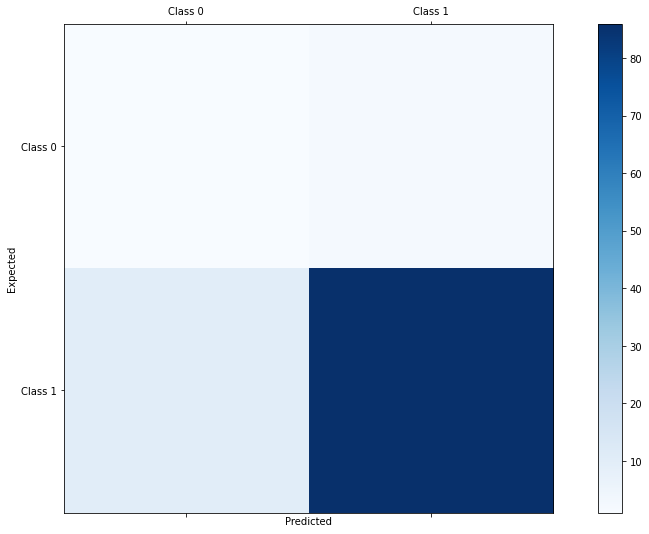

In [19]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Random under-sampling:
0    30
1    30
Name: label, dtype: int64


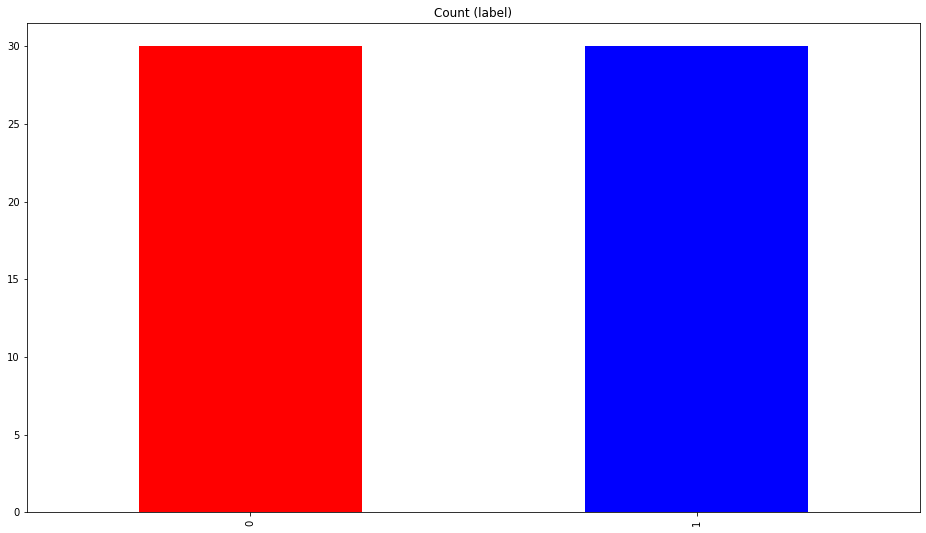

In [20]:
# Class count
count_class_0, count_class_1 = df.label.value_counts()
 
# Divide by class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
    
print('Random under-sampling:')
print(df_test_under.label.value_counts())
colors = ['r', 'b']
df_test_under.label.value_counts().plot(kind='bar', title='Count (label)',color = colors);

Random over-sampling:
0    463
1    463
Name: label, dtype: int64


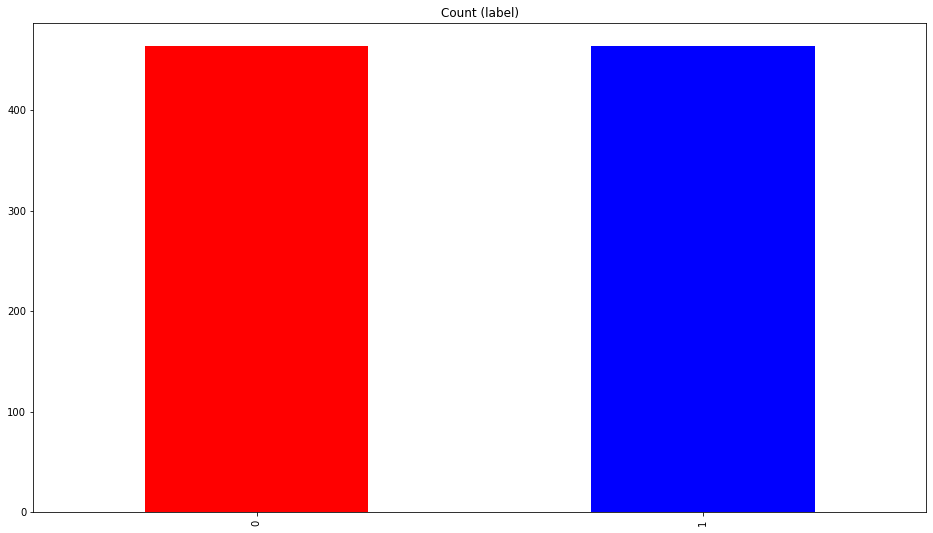

In [21]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())
colors = ['r', 'b']
df_test_over.label.value_counts().plot(kind='bar', title='Count (label)',color = colors);

In [22]:
df_test_under

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,label
1177,HS76_YEAST,0.60,0.46,0.51,0.10,0.5,0.0,0.48,0.31,0
26,ADH4_YEAST,0.59,0.45,0.53,0.19,0.5,0.0,0.59,0.27,0
1295,TRP_YEAST,0.48,0.44,0.51,0.24,0.5,0.0,0.49,0.22,0
27,KAD1_YEAST,0.57,0.47,0.60,0.18,0.5,0.0,0.51,0.22,0
1212,IF2A_YEAST,0.51,0.59,0.55,0.21,0.5,0.0,0.52,0.22,0
1457,TCTP_YEAST,0.47,0.38,0.58,0.19,0.5,0.0,0.57,0.22,0
1292,TRPE_YEAST,0.33,0.46,0.53,0.12,0.5,0.0,0.50,0.27,0
1352,VP45_YEAST,0.46,0.52,0.51,0.13,0.5,0.0,0.47,0.22,0
56,ASSY_YEAST,0.66,0.62,0.49,0.10,0.5,0.0,0.49,0.22,0
815,PPCK_YEAST,0.45,0.47,0.53,0.15,0.5,0.0,0.52,0.27,0


In [24]:
from sklearn.metrics import classification_report
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.09      0.33      0.14         3
           1       0.98      0.90      0.93        96

    accuracy                           0.88        99
   macro avg       0.53      0.61      0.54        99
weighted avg       0.95      0.88      0.91        99



In [25]:
!pip install -U imbalanced-learn

In [26]:
import imblearn

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.829
